In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/github_repos/data_analysis/pandas

/content/drive/MyDrive/github_repos/data_analysis/pandas


# Introduction

Now you are ready to get a deeper understanding of your data.

Run the following cell to load your data and some utility functions (including code to check your answers).

In [3]:
import pandas as pd
pd.set_option("display.max_rows", 5)
reviews = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv", index_col=0)

reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Exercises

## 1.

What is the median of the `points` column in the `reviews` DataFrame?

In [4]:
median_points = reviews["points"].median()


## 2.
What countries are represented in the dataset? (Your answer should not include any duplicates.)

In [ ]:
countries = reviews["country"].unique()


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

## 3.
How often does each country appear in the dataset? Create a Series `reviews_per_country` mapping countries to the count of reviews of wines from that country.

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

<Axes: xlabel='country'>

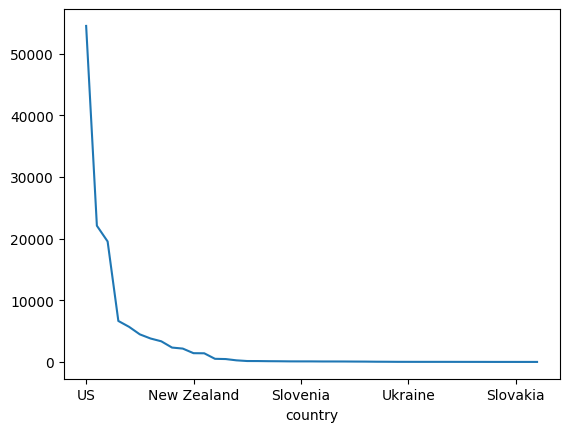

In [ ]:
reviews_per_country = reviews["country"].value_counts()

reviews_per_country.plot()

## 4.
Create variable `centered_price` containing a version of the `price` column with the mean price subtracted.

(Note: this 'centering' transformation is a common preprocessing step before applying various machine learning algorithms.)

In [ ]:
centered_price = reviews["price"] - reviews["price"].mean()


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

## 5.
I'm an economical wine buyer. Which wine is the "best bargain"? Create a variable `bargain_wine` with the title of the wine with the highest points-to-price ratio in the dataset.

In [ ]:
bargain_idx = (reviews.points / reviews.price).idxmax()

print(bargain_idx)

bargain_wine = reviews.loc[bargain_idx, 'title']

print(bargain_wine)



64590
Bandit NV Merlot (California)


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

## 6.
There are only so many words you can use when describing a bottle of wine. Is a wine more likely to be "tropical" or "fruity"? Create a Series `descriptor_counts` counting how many times each of these two words appears in the `description` column in the dataset. (For simplicity, let's ignore the capitalized versions of these words.)

In [ ]:
descriptor_counts = {"tropical":0, "fruity":0}

#print(reviews["description"].head())
#print(reviews["description"].map(lambda x: "fruit" in x))



for search in ["tropical", "fruity"]:
    for x in reviews["description"]:
        if search in x:
            descriptor_counts[search] += 1


descriptor_counts = pd.Series(descriptor_counts)
print(descriptor_counts)

n_trop = reviews.description.map(lambda desc: "tropical" in desc).sum()
n_fruity = reviews.description.map(lambda desc: "fruity" in desc).sum()
descriptor_counts2 = pd.Series([n_trop, n_fruity], index=['tropical', 'fruity'])

print()
print(descriptor_counts2)


tropical    3607
fruity      9090
dtype: int64

tropical    3607
fruity      9090
dtype: int64


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

## 7.
We'd like to host these wine reviews on our website, but a rating system ranging from 80 to 100 points is too hard to understand - we'd like to translate them into simple star ratings. A score of 95 or higher counts as 3 stars, a score of at least 85 but less than 95 is 2 stars. Any other score is 1 star.

Also, the Canadian Vintners Association bought a lot of ads on the site, so any wines from Canada should automatically get 3 stars, regardless of points.

Create a series `star_ratings` with the number of stars corresponding to each review in the dataset.

In [ ]:
"""
star_ratings = reviews["points"].copy()
for i in range(len(reviews["points"])):
    if reviews.loc[i,"points"] >= 95 or reviews.loc[i,"country"] == "Canada":
        star_ratings[i] = 3
    elif reviews.loc[i,"points"] >= 85 :
        star_ratings[i] = 2
    else:
        star_ratings[i] = 1
"""

def stars(row):
    if row.points >= 95 or row.country == "Canada":
        return 3
    elif row.points >= 85:
        return 2
    return 1

star_ratings = reviews.apply(stars, axis="columns")


print(star_ratings)



0         2
1         2
         ..
129969    2
129970    2
Length: 129971, dtype: int64


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>